In [11]:
import pandas as pd
import utils.preprocessing as pp
import utils.constants as c
import utils.visualization as vis

In [12]:
import importlib

importlib.reload(pp)
importlib.reload(c)
importlib.reload(vis)

<module 'utils.visualization' from 'd:\\FERI\\transfer-learning\\src\\utils\\visualization.py'>

In [13]:
datasets = c.get_countries('Rice')
dfs = []

In [14]:
for dataset in datasets:
    df = pd.read_csv(dataset['raw'])
    df = pp.sort_extract_price(df, 'Rice')
    df.to_csv(dataset['processed'], index=False)
    dfs.append(df)

C:\Users\user\AppData\Local\Temp\ipykernel_23172\2736141004.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset['raw'])
C:\Users\user\AppData\Local\Temp\ipykernel_23172\2736141004.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset['raw'])
C:\Users\user\AppData\Local\Temp\ipykernel_23172\2736141004.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset['raw'])
C:\Users\user\AppData\Local\Temp\ipykernel_23172\2736141004.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset['raw'])


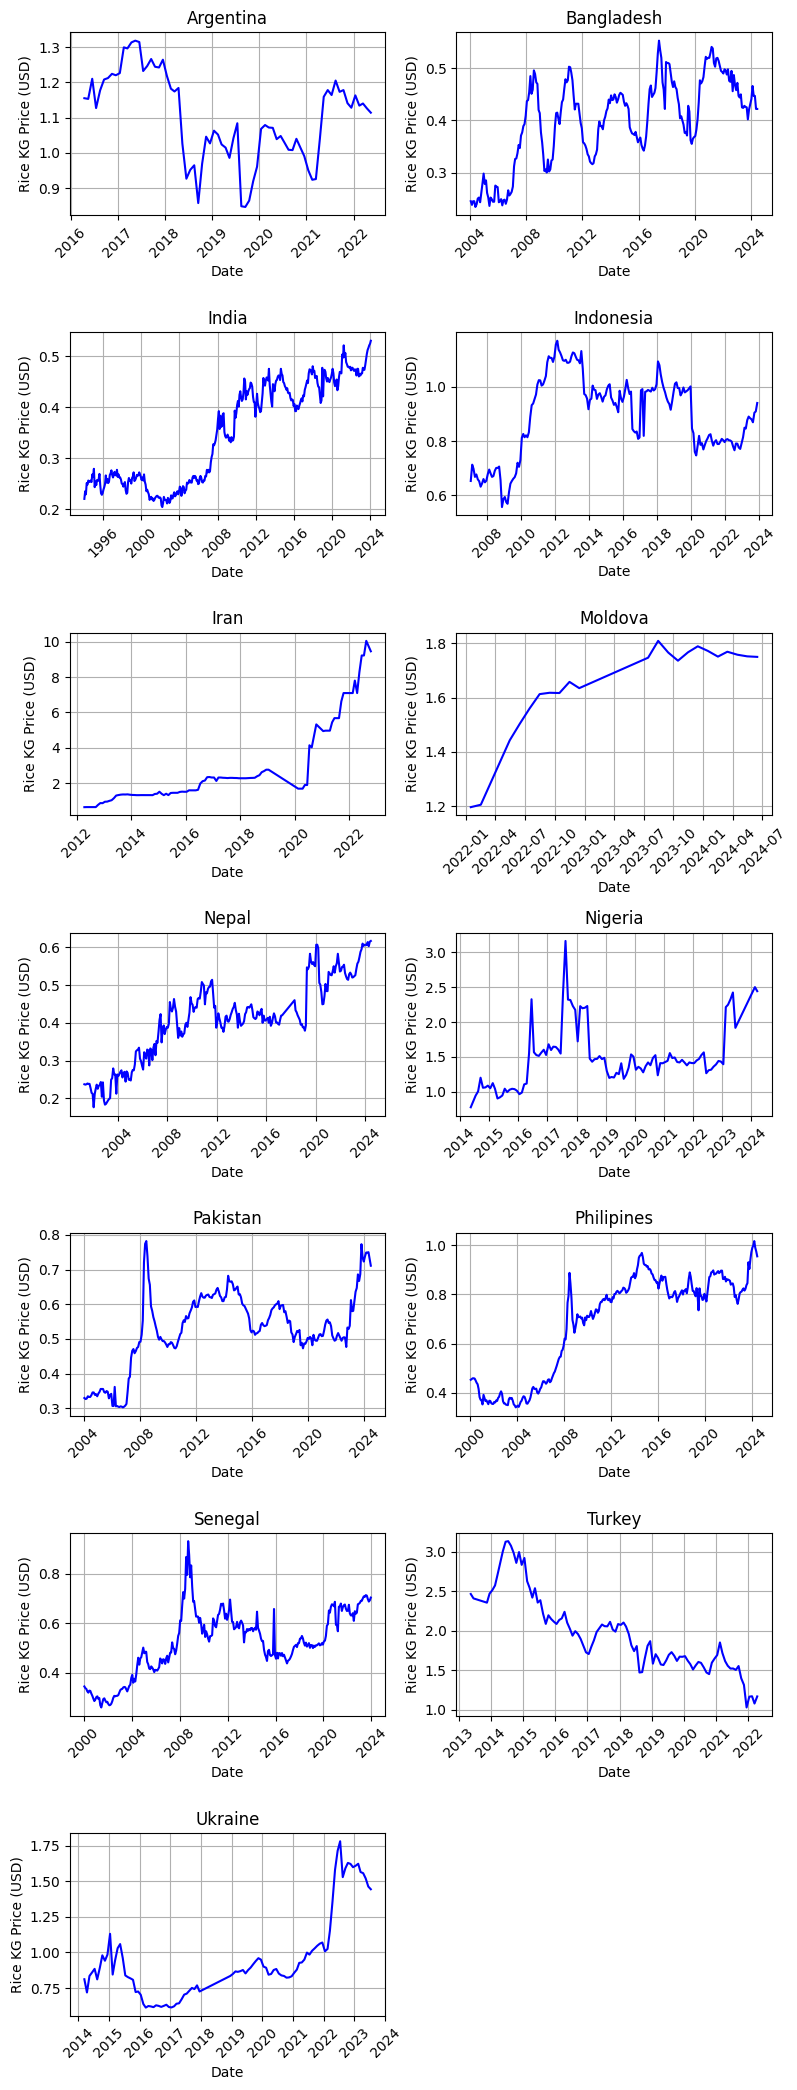

In [15]:
vis.plot_line_charts(dfs, 'date', 'usdprice', ['Argentina', 'Bangladesh' ,'India', 'Indonesia', 'Iran', 'Moldova', 'Nepal' , 'Nigeria', 'Pakistan' ,'Philipines', 'Senegal', 'Turkey', 'Ukraine'], 'Date', 'Rice KG Price (USD)')